In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline

#----------------------------------------------------------------

from keras.utils import np_utils, to_categorical 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.


In [2]:
train_data_path= "train"

images = []
classes=[]
for class_folder_name in os.listdir(train_data_path):
    class_folder_path = os.path.join(train_data_path, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images.append(image_bgr)
        classes.append(class_label)

In [3]:
print('Total Number of images are :',len(images))
print('The shape of a sample image is :',images[0].shape)

Total Number of images are : 4750
The shape of a sample image is : (644, 644, 3)


Text(0.5,0.98,'Class Distribution of the dataset')

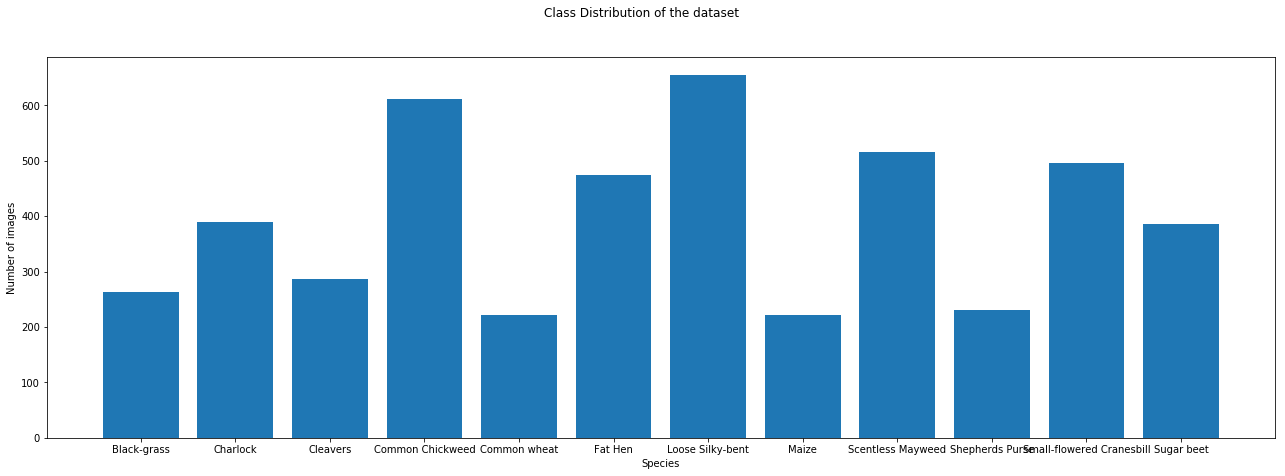

In [4]:
images = np.array(images)
classes = np.array(classes)
values =[]
labels=[]
for label in set(classes):
    values.append(len(images[classes == label]))
    labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel("Species")
ax.set_ylabel("Number of images")
fig.suptitle('Class Distribution of the dataset')

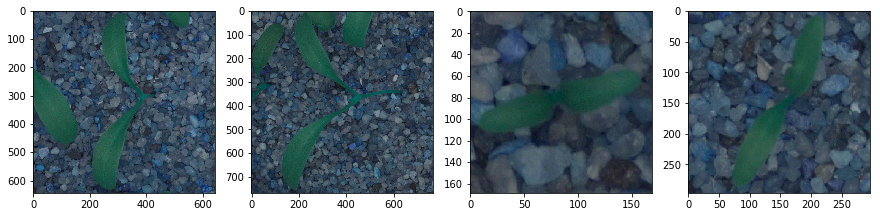

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15,15))
axs[0].imshow(images[0])
axs[1].imshow(images[10])
axs[2].imshow(images[42])
axs[3].imshow(images[65])

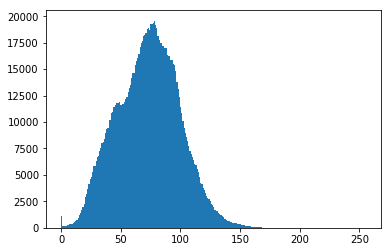

In [6]:
plt.hist(images[0].ravel(),256,[0,255])
plt.show()

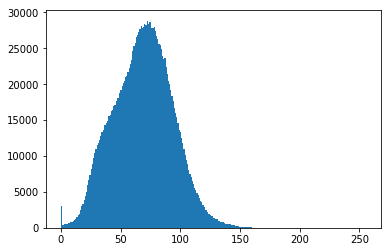

In [7]:
plt.hist(images[10].ravel(),256,[0,255])
plt.show()

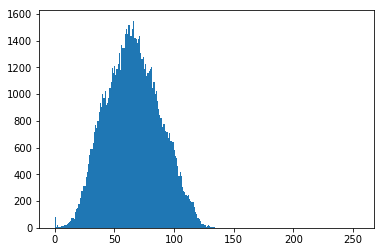

In [8]:
plt.hist(images[42].ravel(),256,[0,255])
plt.show()

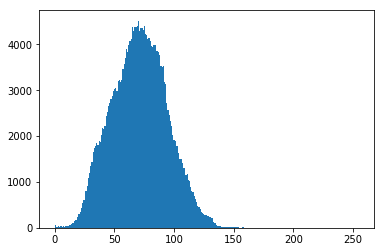

In [9]:
plt.hist(images[65].ravel(),256,[0,255])
plt.show()

### From the histograms of our sample images, we can infer that:
* The intensities of the images are highly skewed towards left. That means, the images are **darker.**
* All the values of intensities in our images lie between the range **0-150**
* Performing histogram equalization might improve the model score, even though it is not guaranteed. 